In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Load Dataset

In [2]:
dataset = pd.read_csv('C:/Users/rizky/OneDrive/Program/machine-learning/dataset/Data.csv')

In [3]:
dataset.head()

,Negara,Umur,Gaji,Transaksi
0,Jakarta,44.0,8000000.0,Tidak
1,Bandung,27.0,6500000.0,Ya
2,Surabaya,30.0,4500000.0,Tidak
3,Bandung,38.0,7500000.0,Tidak
4,Surabaya,40.0,NaN,Ya


In [4]:
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

In [5]:
X

,Umur,Gaji
0,44.0,8000000.0
1,27.0,6500000.0
2,30.0,4500000.0
3,38.0,7500000.0
4,40.0,NaN
5,35.0,10000000.0
6,NaN,8250000.0
7,48.0,9750000.0
8,50.0,7674000.0
9,37.0,6700000.0


In [6]:
y

0    Tidak
1       Ya
2    Tidak
3    Tidak
4       Ya
5       Ya
6    Tidak
7       Ya
8    Tidak
9       Ya
Name: Transaksi, dtype: object

In [7]:
dataset.isnull().sum()

Negara       0
Umur         1
Gaji         1
Transaksi    0
dtype: int64

## Imputasi pada NaN

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = pd.DataFrame(imputer.transform(X), columns=X.columns)
X_filled = X

In [9]:
X_filled

,Umur,Gaji
0,44.000000,8.000000e+06
1,27.000000,6.500000e+06
2,30.000000,4.500000e+06
3,38.000000,7.500000e+06
4,40.000000,7.652667e+06
5,35.000000,1.000000e+07
6,38.777778,8.250000e+06
7,48.000000,9.750000e+06
8,50.000000,7.674000e+06
9,37.000000,6.700000e+06


## Feature Scalling

In [10]:
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()
# Option: keep a scaled copy for inspection but do scaling after split to avoid leakage
scaled_X = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)
# If you prefer to scale only after splitting to avoid data leakage, comment the lines above and scale X_train/X_test later
scaled_X.head()

,Umur,Gaji
0,0.739130,0.636364
1,0.000000,0.363636
2,0.130435,0.000000
3,0.478261,0.545455
4,0.565217,0.573212


In [11]:
scaled_X

,Umur,Gaji
0,0.739130,0.636364
1,0.000000,0.363636
2,0.130435,0.000000
3,0.478261,0.545455
4,0.565217,0.573212
5,0.347826,1.000000
6,0.512077,0.681818
7,0.913043,0.954545
8,1.000000,0.577091
9,0.434783,0.400000


In [12]:
scaled_X = pd.DataFrame(X)

In [13]:
scaled_X

,Umur,Gaji
0,44.000000,8.000000e+06
1,27.000000,6.500000e+06
2,30.000000,4.500000e+06
3,38.000000,7.500000e+06
4,40.000000,7.652667e+06
5,35.000000,1.000000e+07
6,38.777778,8.250000e+06
7,48.000000,9.750000e+06
8,50.000000,7.674000e+06
9,37.000000,6.700000e+06


In [14]:
data = pd.concat([X, y.rename('Label')], axis=1)

In [15]:
data

,Umur,Gaji,Label
0,44.000000,8.000000e+06,Tidak
1,27.000000,6.500000e+06,Ya
2,30.000000,4.500000e+06,Tidak
3,38.000000,7.500000e+06,Tidak
4,40.000000,7.652667e+06,Ya
5,35.000000,1.000000e+07,Ya
6,38.777778,8.250000e+06,Tidak
7,48.000000,9.750000e+06,Ya
8,50.000000,7.674000e+06,Tidak
9,37.000000,6.700000e+06,Ya


In [16]:
y = pd.Series(y)

In [17]:
y

0    Tidak
1       Ya
2    Tidak
3    Tidak
4       Ya
5       Ya
6    Tidak
7       Ya
8    Tidak
9       Ya
Name: Transaksi, dtype: object

In [18]:
y = y.map({ 'Ya': 1, 'Tidak': 0})

In [19]:
y

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: Transaksi, dtype: int64

## Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train

,Umur,Gaji
0,44.000000,8.000000e+06
7,48.000000,9.750000e+06
2,30.000000,4.500000e+06
9,37.000000,6.700000e+06
4,40.000000,7.652667e+06
3,38.000000,7.500000e+06
6,38.777778,8.250000e+06


In [22]:
X_test

,Umur,Gaji
8,50.0,7674000.0
1,27.0,6500000.0
5,35.0,10000000.0


In [23]:
y_train

0    0
7    1
2    0
9    1
4    1
3    0
6    0
Name: Transaksi, dtype: int64

In [24]:
y_test

8    0
1    1
5    1
Name: Transaksi, dtype: int64

## Normalisasi

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[ 0.8790543 ,  0.34975822],
       [ 1.64292217,  1.52446252],
       [-1.79448326, -1.99965039],
       [-0.45771448, -0.52287926],
       [ 0.11518643,  0.11660738],
       [-0.26674751,  0.01412842],
       [-0.11821765,  0.51757312]])

In [27]:
X_test

array([[ 2.02485611,  0.13092759],
       [-2.36738416, -0.65713118],
       [-0.83964842,  1.69227742]])

## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
y_pred

array([0, 0, 0])

In [31]:
y_test

8    0
1    1
5    1
Name: Transaksi, dtype: int64

## Evaluasi Model

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [33]:
print("Akurasi : {}%".format(acc * 100))
print("Confusion Matrix : ")
print(cm)

Akurasi : 33.33333333333333%
Confusion Matrix : 
[[1 0]
 [2 0]]


## Visualisasi Data KNN

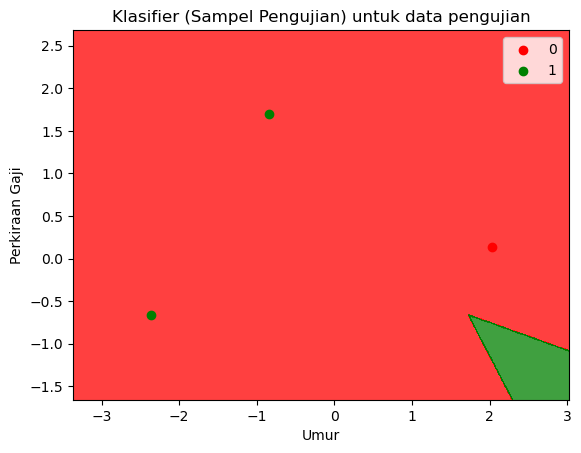

In [34]:
# Mengambil data pengujian
X_set, y_set = X_test, y_test

# Membuat grid untuk plot batas keputusan
# Menentukan nilai min dan max untuk sumbu x (kolom 0) dan sumbu y (kolom 1) dari data,
# ditambah/dikurangi 1 untuk margin.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Memplot batas keputusan (Decision Boundary)
# Menggunakan classifier untuk memprediksi setiap titik di grid, kemudian di-reshape
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Menetapkan batas sumbu x dan y
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Memplot titik-titik data pengujian
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)

# Menambahkan judul dan label sumbu
plt.title('Klasifier (Sampel Pengujian) untuk data pengujian')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')

# Menampilkan legenda
plt.legend()
plt.show() # Menambahkan plt.show() agar plot ditampilkan

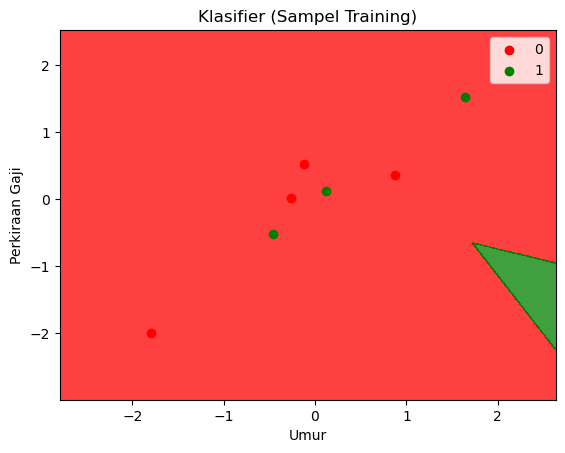

In [35]:
# Mengambil data pelatihan
X_set, y_set = X_train, y_train

# Membuat grid untuk plot batas keputusan
# Menentukan nilai min dan max untuk sumbu x (kolom 0) dan sumbu y (kolom 1) dari data,
# ditambah/dikurangi 1 untuk margin.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Memplot batas keputusan (Decision Boundary)
# Menggunakan classifier untuk memprediksi setiap titik di grid, kemudian di-reshape
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Menetapkan batas sumbu x dan y
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Memplot titik-titik data pelatihan
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)

# Menambahkan judul dan label sumbu
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')

# Menampilkan legenda
plt.legend()
plt.show() # Menambahkan plt.show() agar plot ditampilkan